In [1]:
%reload_ext autoreload
%autoreload 2
from functions import *

# Downloading Kaggle Dataset

In [ ]:
!pip install kagglehub

In [ ]:
# Download to default location
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")
print("Downloaded to:", path)

# Create data directory if it doesn't exist
os.makedirs("./data", exist_ok=True)

# Move files to your desired location (cut, not copy)
for file in os.listdir(path):
    shutil.move(os.path.join(path, file), f"./data/{file}")
    
print("Files moved to ./data/")

# Optionally, remove the empty download directory
try:
    os.rmdir(path)
    print("Cleaned up empty download directory")
except OSError:
    print("Download directory not empty or couldn't be removed")


# Intial look on the data

In [13]:
# Load the dataset
df = pd.read_csv('./data/StudentPerformanceFactors.csv')
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (6607, 20)

First few rows:


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [14]:
# Basic info about the dataset
print("Dataset info:")
df.info()
print("\nColumn names:")
print(df.columns.tolist())
print("\nBasic statistics:")
df.describe()

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 n

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# Initial model -> i will improve it but will use this as a benchmark (already done in the old trial folder so i have a bench mark)

In [15]:
# df_model = df.copy()

# # Handle categorical variables using the custom function
# df_model = encode_categorical_features(df_model)

# # Prepare features (all columns except target)
# feature_cols = [col for col in df_model.columns if col != 'Exam_Score']
# X_all = df_model[feature_cols]
# y = df_model['Exam_Score']

# print(f"Using {len(feature_cols)} features:")
# print(feature_cols)

In [16]:
# df_model.head()

In [17]:
# # we need to either drop or fill NaN values before training
# # we will drop rows with NaN values for simplicity
# print("Initial shape of features:", X_all.shape)

# X_all = X_all.dropna()
# y = y[X_all.index]  # Align target with features

# print("Shape of features after NaN handling:", X_all.shape)

In [22]:
# initial_model = train_and_evaluate_model(X_all, y,model_type='linear')

# 1 - Exploratory Data Analysis (EDA)

In [23]:
df_analysis = df.copy()

# 1.1 Heatmap

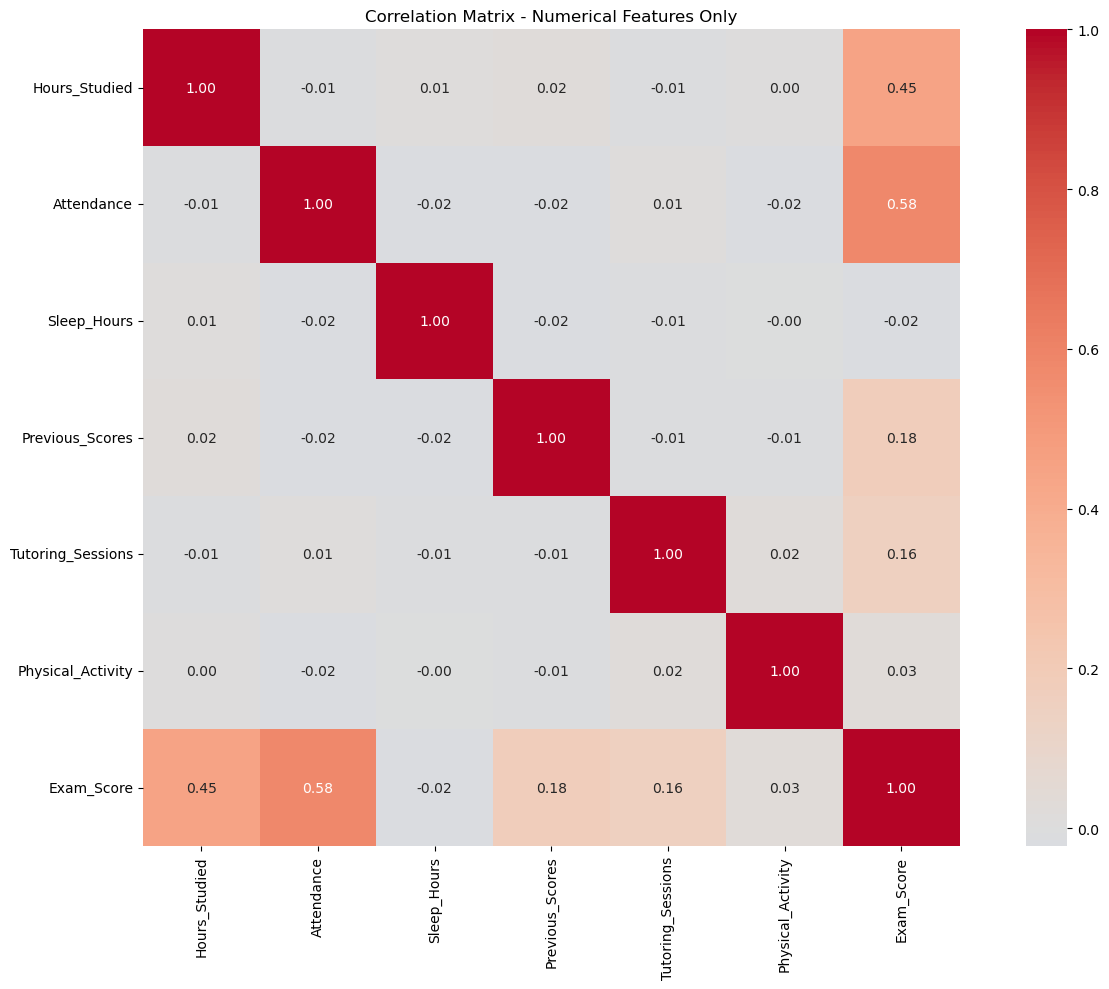

In [24]:
# Correlation heatmap for numerical features only
correlation_matrix_numeric = df_analysis.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix_numeric, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Matrix - Numerical Features Only')
plt.tight_layout()
plt.show()

In [25]:
# correlations with target
exam_correlations = correlation_matrix_numeric['Exam_Score'].abs().sort_values(ascending=True)
print(exam_correlations.head(10))

Sleep_Hours          0.017022
Physical_Activity    0.027824
Tutoring_Sessions    0.156525
Previous_Scores      0.175079
Hours_Studied        0.445455
Attendance           0.581072
Exam_Score           1.000000
Name: Exam_Score, dtype: float64


# 1.2 Ploting Numerical Cols

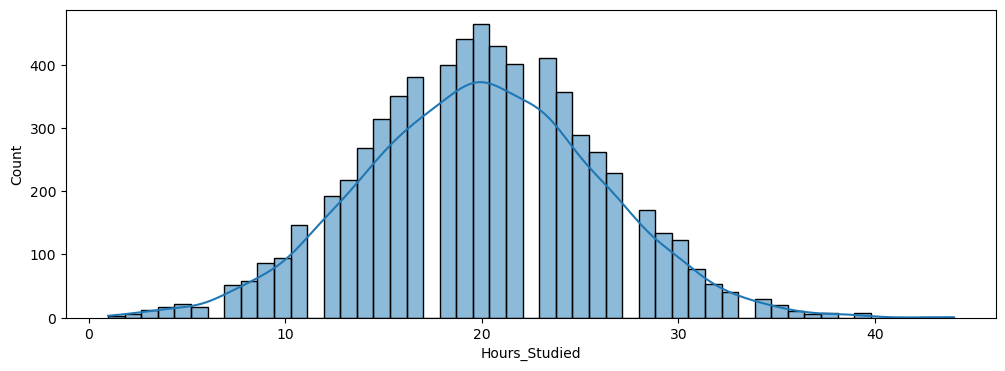

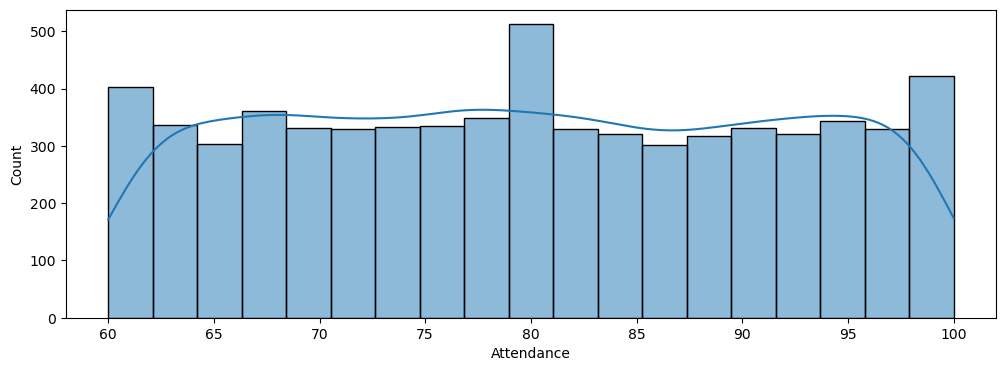

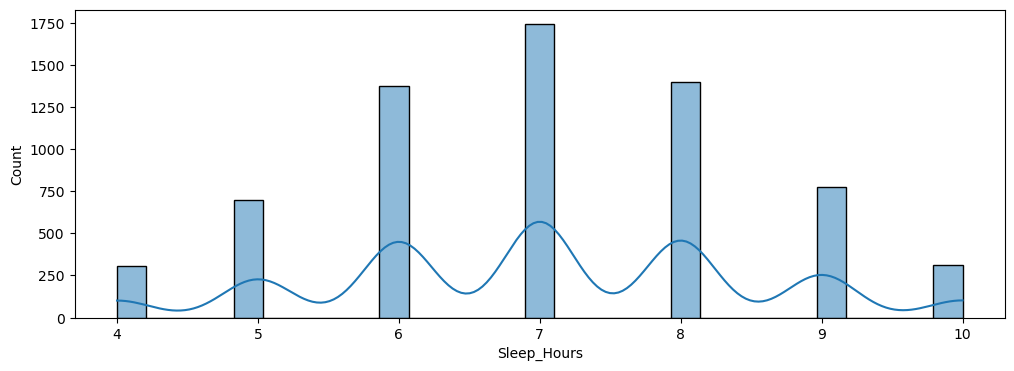

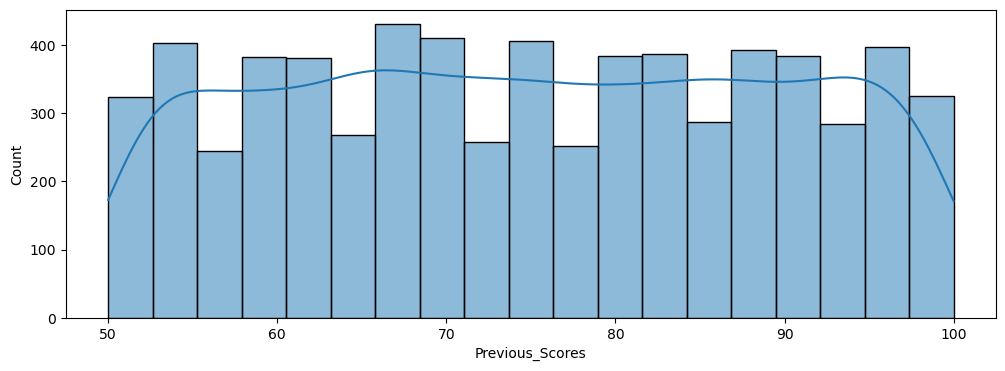

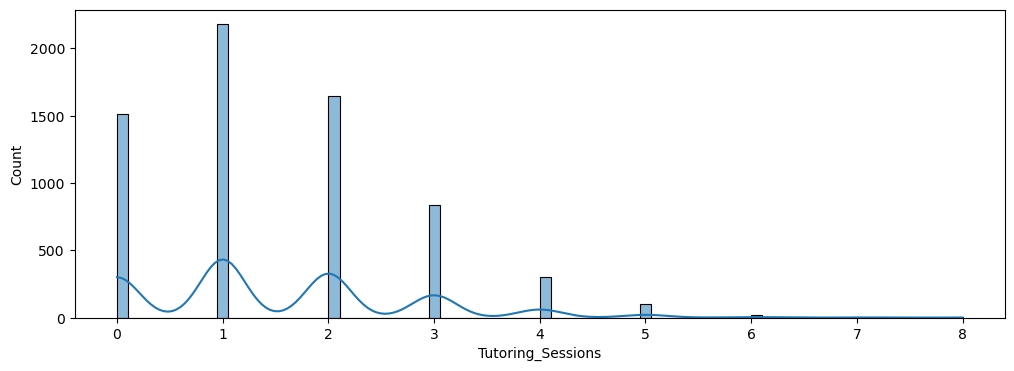

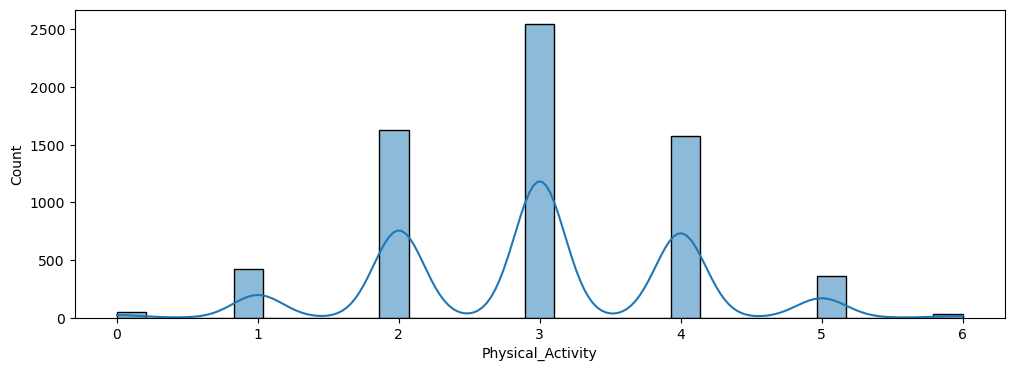

In [26]:
for col in df_analysis.columns:
    if df_analysis[col].dtype != 'O' and col != 'Exam_Score': # Only plot numerical columns
        plt.figure(figsize=(12, 4))
        sns.histplot(df_analysis[col],kde=True)
        plt.show()

# 1.3 Analysis on categorical Cols

In [27]:
categorical_columns = df_analysis.select_dtypes(include=['object']).columns
for column in categorical_columns:
  print(df_analysis[column].unique())
# here we have two problems
# 1- we need to map the categorical features to numerical values
# 2- we need to handle the NaN values

['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['No' 'Yes']
['Low' 'Medium' 'High']
['Yes' 'No']
['Low' 'Medium' 'High']
['Medium' 'High' 'Low' nan]
['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['No' 'Yes']
['High School' 'College' 'Postgraduate' nan]
['Near' 'Moderate' 'Far' nan]
['Male' 'Female']


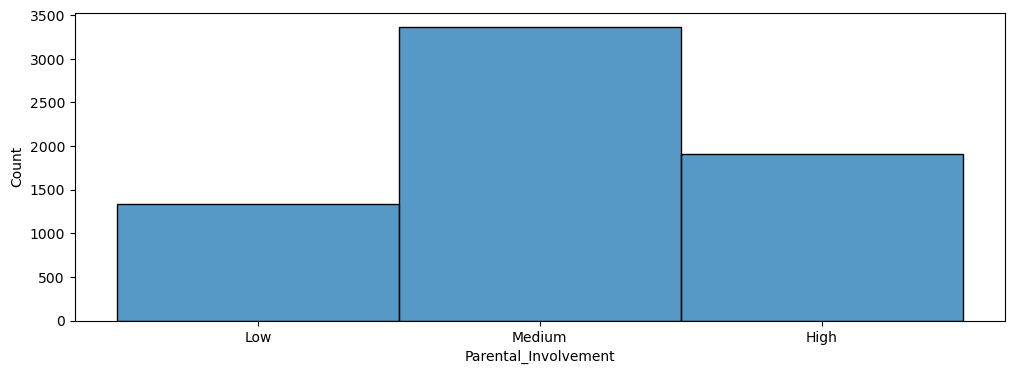

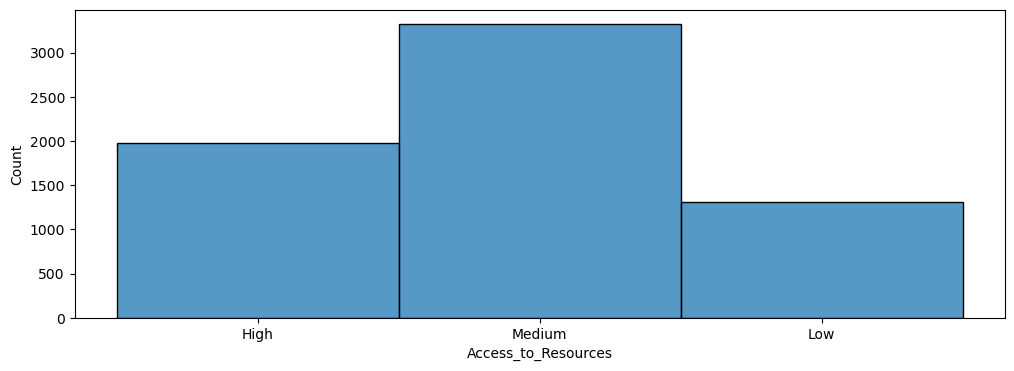

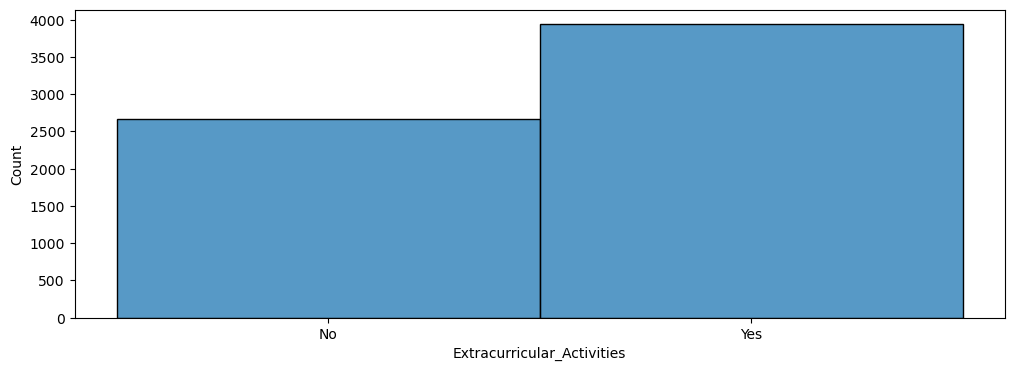

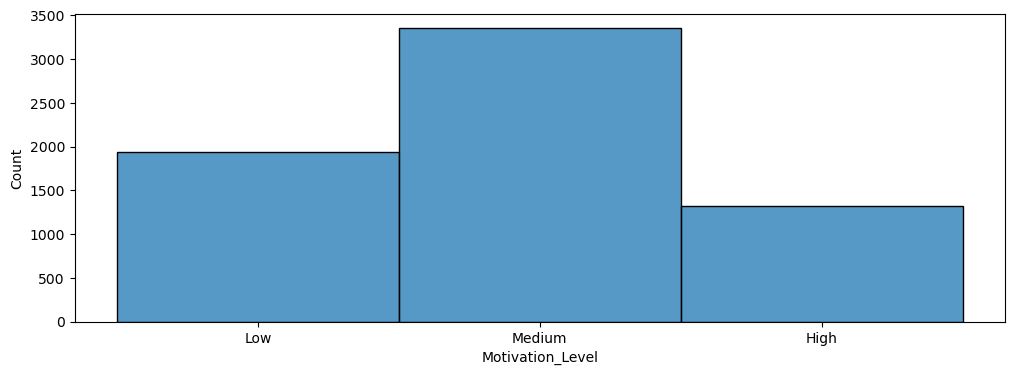

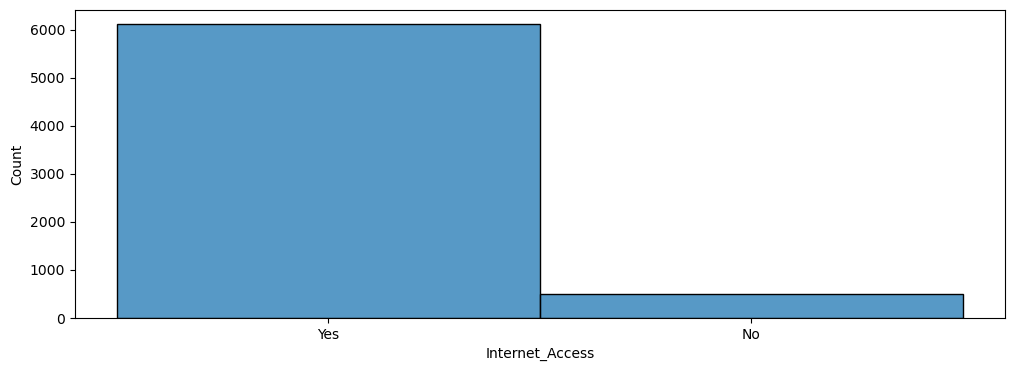

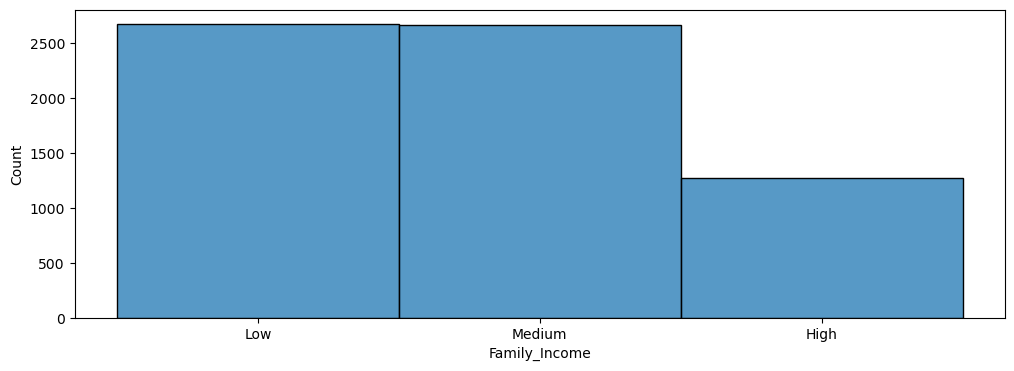

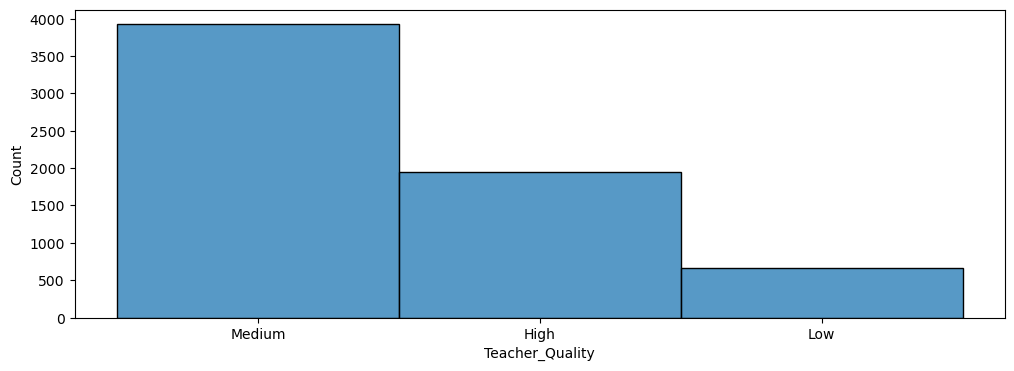

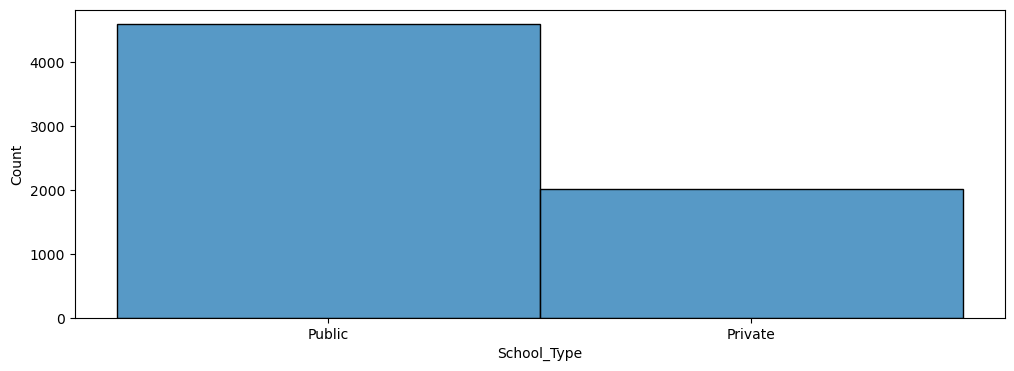

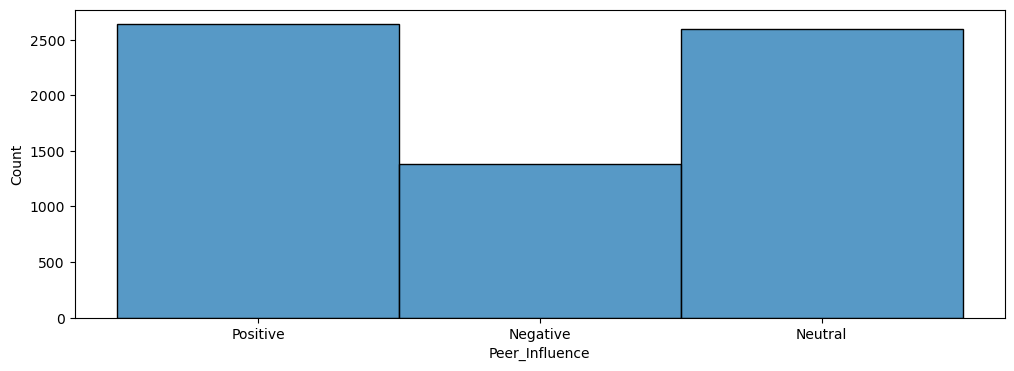

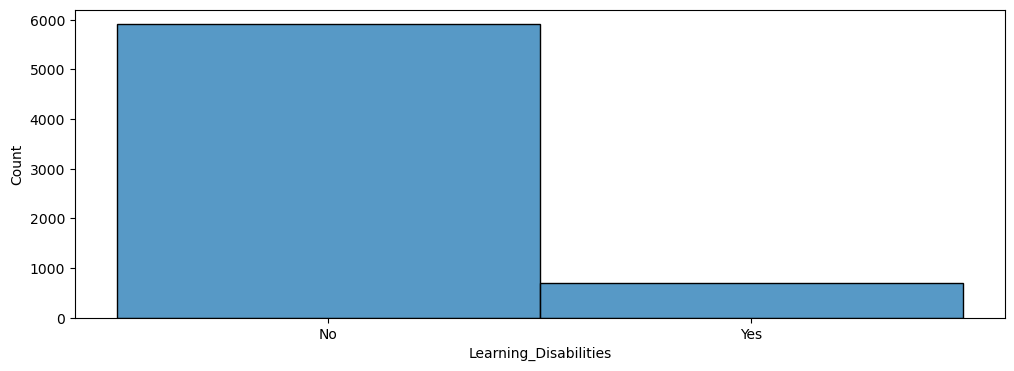

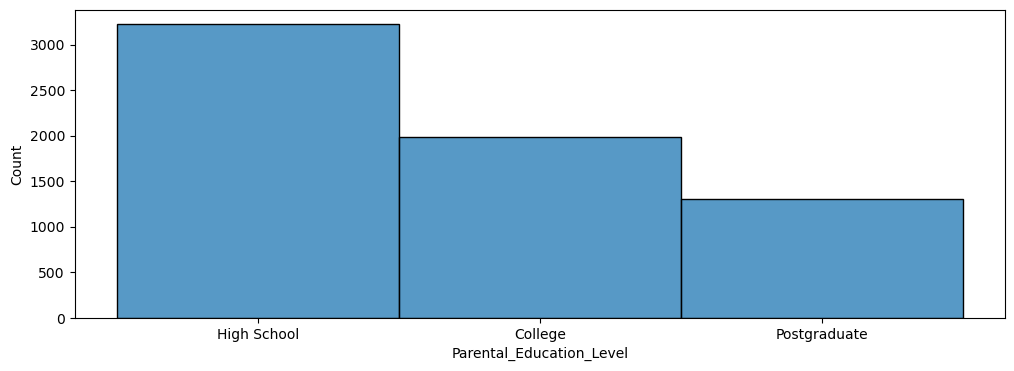

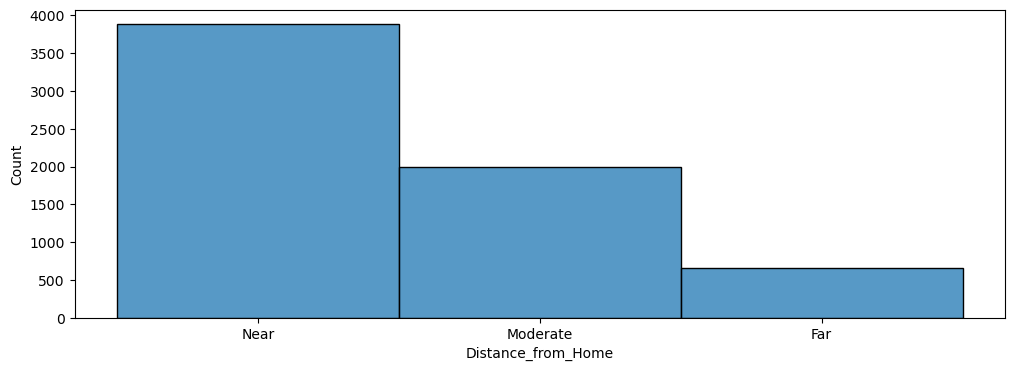

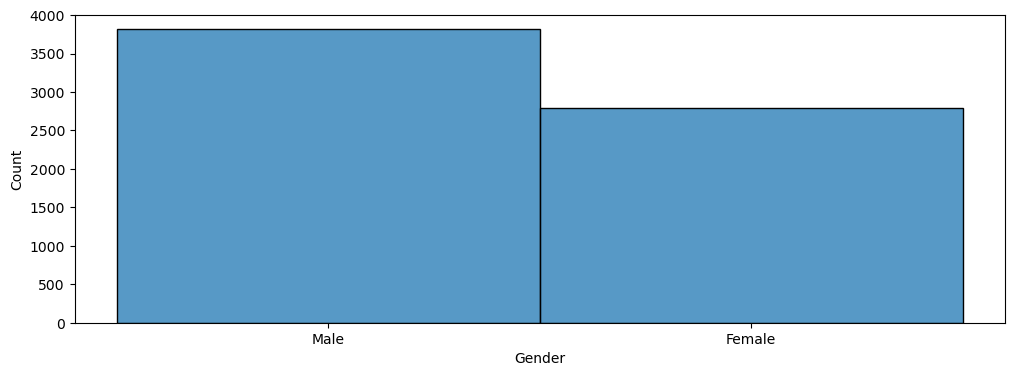

In [28]:
# TEXT
# for column in categorical_columns:
#     print("Column: ",df_analysis[column].value_counts())

# VISUALIZATION
for col in df_analysis.columns:
    if df_analysis[col].dtype == 'O':
        plt.figure(figsize=(12, 4))
        sns.histplot(df_analysis[col],kde=False)
        plt.show()

# 1.3.1 Target distribution -> do we have unbalnced target?

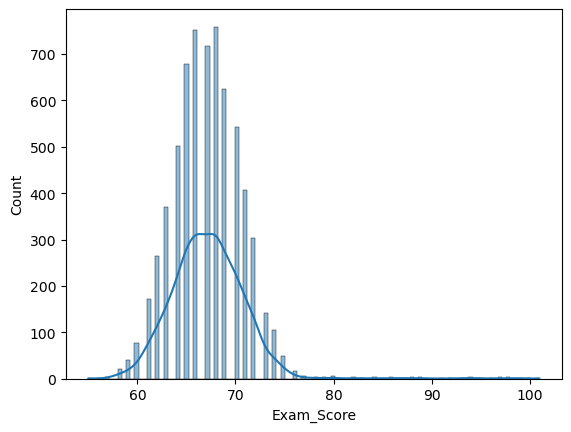

In [29]:
sns.histplot(df_analysis['Exam_Score'],kde=True)
plt.show()

TARGET TRANSFORMATION ANALYSIS (NO DATA LEAKAGE)
Train set size: 5285
Test set size: 1322

Original skewness (TRAIN ONLY): 1.710
Square Root skewness (TRAIN): 1.345
Log skewness (TRAIN): 1.031

🎯 BEST TRANSFORMATION (based on TRAIN only): Log
   Training skewness: 1.031
   Test skewness (for verification): 0.763


/Users/omar/Desktop/omar/Elevvo-ML-intern/Task1-Student Score Prediction/Student-Score-Prediction-elevvo/functions.py:99: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


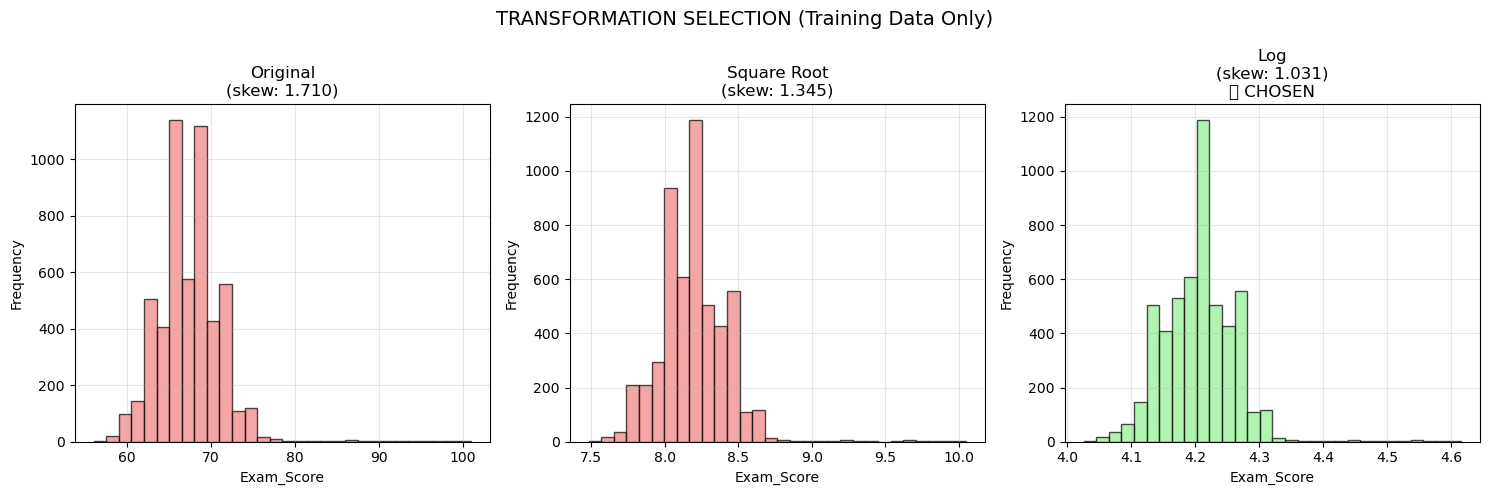

{'best_transformation': 'Log',
 'train_skew': 1.0309088803151396,
 'test_skew': 0.7632947782249683}

In [30]:
# Explore target transformations like Square Root and Log -> may try them to see if they help with the model performance
explore_target_transformations(df_analysis, 'Exam_Score',show_results=False)

# 2 - Data cleaning & Pre-processing

In [31]:
df_clean = df.copy()

# 2.1 Duplicate data

In [32]:
# Check for duplicates
print(f"\nDuplicate rows in data frame: {df_clean.duplicated().sum()}")


Duplicate rows in data frame: 0


# 2.2 Missing Data (NAN values)

In [33]:
# Check for missing values
print(f"Missing values in data frame: {df.isnull().sum()}")

# when solving missing values we need to split the data into train and test sets to ensure no data leakage

Missing values in data frame: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64


In [34]:
df_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=42)
print(f"Missing values in train: {df_train.isnull().sum()}")
print(f"Missing values in test: {df_test.isnull().sum()}")

Missing values in train: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               60
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      69
Distance_from_Home            51
Gender                         0
Exam_Score                     0
dtype: int64
Missing values in test: Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Acces

In [35]:
def fill_missing_values_with_most_frequent(df):
    for column in df.columns:
        if df[column].isnull().any():
            most_frequent_value = df[column].mode()[0]
            df[column].fillna(most_frequent_value, inplace=True)
            print(f"Filled NaN in {column} with {most_frequent_value}")


In [36]:
# we will try to fill NaN values with the most frequent value in the column
fill_missing_values_with_most_frequent(df_train)
fill_missing_values_with_most_frequent(df_test)

Filled NaN in Teacher_Quality with Medium
Filled NaN in Parental_Education_Level with High School
Filled NaN in Distance_from_Home with Near
Filled NaN in Teacher_Quality with Medium
Filled NaN in Parental_Education_Level with High School
Filled NaN in Distance_from_Home with Near


/var/folders/77/n_9rqs5n2hq31dqwm43rln840000gn/T/ipykernel_1136/3904676104.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(most_frequent_value, inplace=True)


In [37]:
# recombine the data
df_clean = pd.concat([df_train, df_test], ignore_index=True)

# check if there are still any missing values
print(f"Missing values in cleaned data frame: {df_clean.isnull().sum()}")

Missing values in cleaned data frame: Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64


# 2.3 encode categorical columns

In [38]:
# we have two types of categorical_columns

# 1- Ordinal columns: Categories have an order (e.g., Low < Medium < High).
# Examples: Access_to_Resources, Motivation_Level, Parental_Involvement.
# solution: Label Encoding (single column with multiple values)
    
# 2- Nominal columns: Categories have no  order, they are just labels.
# Examples: Internet_Access,Gender, School_Type.
# solution: One-Hot Encoding (n-1 columns for n categories) (n-1 -> drop_first=True)

In [39]:
ordinal_columns = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Distance_from_Home',        # Near < Moderate < Far
    'Peer_Influence',            # Positive, Neutral, Negative
    'Parental_Education_Level'   # High School < College < Postgraduate
]

nominal_columns = [
    'Extracurricular_Activities',  # Yes, No
    'Internet_Access',             # Yes, No
    'Learning_Disabilities',       # Yes, No
    'Gender',                      # Male, Female
    'School_Type'                  # Public, Private
]

In [40]:
# One-Hot Encoding for nominal columns
df_clean = pd.get_dummies(df_clean, columns=nominal_columns, drop_first=True)

# Label Encoding for ordinal columns
label_encoder = LabelEncoder()
for column in ordinal_columns:
    df_clean[column] = label_encoder.fit_transform(df_clean[column])

df_clean.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,Peer_Influence,Physical_Activity,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,Learning_Disabilities_Yes,Gender_Male,School_Type_Public
0,27,79,1,0,8,63,0,2,1,2,0,5,0,1,69,True,True,False,False,True
1,16,86,0,2,7,94,2,2,1,0,1,3,1,1,69,True,True,False,False,True
2,22,87,1,2,8,83,1,1,1,2,1,1,0,0,66,False,True,False,True,True
3,18,100,0,2,10,86,2,1,2,2,1,3,1,2,72,True,True,False,True,True
4,35,78,0,1,10,99,2,1,1,2,2,2,1,2,72,True,True,False,True,False


# 2.4 Outlier detection (z-score)

In [41]:
# Removing outliers from dataset based on the Z-score method
print("Shape before removing outliers:", df_clean.shape)

z = np.abs((df_clean - df_clean.mean()) / df_clean.std())
threshold = 3
df_clean = df_clean[(z < threshold).all(axis=1)]

print(f"Shape after removing outliers: {df_clean.shape}") 

Shape before removing outliers: (6607, 20)
Shape after removing outliers: (6015, 20)


# 2.5 Feature normalization (standard scaler)

In [42]:
# Split the data into train and test sets so no data leakage happens
df_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=42)

In [43]:
# Identify numerical columns (exclude target and encoded categorical columns)
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                  'Tutoring_Sessions', 'Physical_Activity']

# Initialize the scaler
scaler = StandardScaler()

# Fit scaler on training data only (avoid data leakage)
scaler.fit(df_train[numerical_cols])

# Transform both train and test sets
df_train_scaled = df_train.copy()
df_test_scaled = df_test.copy()

df_train_scaled[numerical_cols] = scaler.transform(df_train[numerical_cols])
df_test_scaled[numerical_cols] = scaler.transform(df_test[numerical_cols])

print("StandardScaler applied successfully!")
print(f"Scaled columns: {numerical_cols}")
print(f"Train shape: {df_train_scaled.shape}")
print(f"Test shape: {df_test_scaled.shape}")

# Verify scaling worked
print(f"\nBefore scaling - Train mean: {df_train[numerical_cols].mean().round(2).to_dict()}")
print(f"After scaling - Train mean: {df_train_scaled[numerical_cols].mean().round(2).to_dict()}")
print(f"After scaling - Train std: {df_train_scaled[numerical_cols].std().round(2).to_dict()}")

StandardScaler applied successfully!
Scaled columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']
Train shape: (4812, 20)
Test shape: (1203, 20)

Before scaling - Train mean: {'Hours_Studied': 20.03, 'Attendance': 79.74, 'Sleep_Hours': 7.04, 'Previous_Scores': 75.13, 'Tutoring_Sessions': 1.48, 'Physical_Activity': 2.97}
After scaling - Train mean: {'Hours_Studied': -0.0, 'Attendance': 0.0, 'Sleep_Hours': 0.0, 'Previous_Scores': 0.0, 'Tutoring_Sessions': -0.0, 'Physical_Activity': -0.0}
After scaling - Train std: {'Hours_Studied': 1.0, 'Attendance': 1.0, 'Sleep_Hours': 1.0, 'Previous_Scores': 1.0, 'Tutoring_Sessions': 1.0, 'Physical_Activity': 1.0}


# 3 Model Building

In [44]:
df_model = pd.concat([df_train, df_test], ignore_index=True)

X = df_model.drop(columns=['Exam_Score'])
y = df_model['Exam_Score']

# 3.1 Linear regression

In [45]:
results = train_linear_regression(
    X,
    y,
    regularization=None, # linear regression
    # grid_search=False,   # no grid search -> doesn't matter for linear regression
    # cv_folds=5,
    test_size=0.2,
    random_state=42,
    verbose=True,
)

# print ("Linear Regression Results:")
# print (f"Results predictions : {results['predictions']}")


📊 LINEAR REGRESSION RESULTS
📈 R² Score:
   Training:   0.8825
   Testing:    0.8931
   CV Mean:    0.8815 (±0.0137)

📏 RMSE:
   Training:   1.1337
   Testing:    1.0811

📐 MAE:
   Training:   0.9032
   Testing:    0.8707

✅ Model generalizes well


# 3.2 Polynomial regression

In [48]:
results = train_polynomial_regression(
    X,
    y,
    degree=2,
    # grid_search=False,
    # cv_folds=5,
    test_size=0.2,
    random_state=42,
    verbose=True,
)

🔧 Training Polynomial Regression with degree=2

📊 POLYNOMIAL REGRESSION RESULTS
🔢 Polynomial degree: 2
🔧 Feature expansion: 19 → 209

📈 R² Score:
   Training:   0.9861
   Testing:    0.9897
   CV Mean:    0.9846 (±0.0095)

📏 RMSE:
   Training:   0.3905
   Testing:    0.3351

📐 MAE:
   Training:   0.2743
   Testing:    0.2792

⚠️  Warning: Many features created (209)


In [47]:
results = train_polynomial_regression(
    X,
    y,
    # degree=2,
    grid_search=True,
    cv_folds=5,
    test_size=0.2,
    random_state=42,
    verbose=True,
)

🔍 Performing Grid Search for Polynomial Regression... using 8 cores
Testing polynomial degrees: [1, 2, 3, 4]
Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................................poly__degree=1; total time=   0.0s
[CV] END .....................................poly__degree=1; total time=   0.0s
[CV] END .....................................poly__degree=1; total time=   0.0s
[CV] END .....................................poly__degree=1; total time=   0.0s
[CV] END .....................................poly__degree=1; total time=   0.0s
[CV] END .....................................poly__degree=2; total time=   0.0s
[CV] END .....................................poly__degree=2; total time=   0.0s
[CV] END .....................................poly__degree=2; total time=   0.0s
[CV] END .....................................poly__degree=2; total time=   0.0s
[CV] END .....................................poly__degree=2; total time=   0.0s
[CV] END ............

In [ ]:
# Future work:
# - Try different models like Random Forest, XGBoost, etc. -> already tried in the old trial
# - Feature engineering to create new features / drop features that don't contribute much like gender, school type, etc. -> already tried in the old trial
# - Try transforming the target variable (e.g., log transformation) to see if it improves model performance. -> already tried in the old trial
# - Try regularization techniques like Lasso or Ridge to improve model stability.